In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Malgun Gothic')
rc('axes', unicode_minus=False)

import seaborn as sns 

In [2]:
data_all = pd.read_csv('data/과전류샘플데이터.csv')
data_all[:6]

,S하중,S저항,T저항,M하중,M_stroke,C하중,C_stroke,C저항,저항합,Gap,초기위치,이동속도,접촉예측,Trip시간
0,123,0.084,0.756,218,1.95,323,1.70,1.0613,0.840,1.598,8.186,0.0473,34.17,95
1,103,0.083,0.785,216,1.96,298,1.73,1.0578,0.868,1.396,8.145,0.0299,31.62,95
2,104,0.092,0.735,218,1.85,298,1.59,1.1678,0.827,1.552,8.157,0.0369,34.39,106
3,107,0.087,0.765,225,1.83,312,1.65,1.0107,0.852,1.437,8.435,0.0449,30.69,84
4,93,0.085,0.737,221,2.08,299,1.83,1.0552,0.822,1.408,8.247,0.0476,29.67,91
5,109,0.112,0.735,206,1.79,298,1.58,1.1469,0.847,1.763,8.234,0.0477,37.98,103


In [3]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
S하중         86 non-null int64
S저항         86 non-null float64
T저항         86 non-null float64
M하중         86 non-null int64
M_stroke    86 non-null float64
C하중         86 non-null int64
C_stroke    86 non-null float64
C저항         86 non-null float64
저항합         86 non-null float64
Gap         86 non-null float64
초기위치        86 non-null float64
이동속도        86 non-null float64
접촉예측        86 non-null float64
Trip시간      86 non-null int64
dtypes: float64(10), int64(4)
memory usage: 9.5 KB


In [4]:
X = data_all.drop(['Trip시간', '접촉예측'], axis=1)
X[:3]

,S하중,S저항,T저항,M하중,M_stroke,C하중,C_stroke,C저항,저항합,Gap,초기위치,이동속도
0,123,0.084,0.756,218,1.95,323,1.70,1.0613,0.840,1.598,8.186,0.0473
1,103,0.083,0.785,216,1.96,298,1.73,1.0578,0.868,1.396,8.145,0.0299
2,104,0.092,0.735,218,1.85,298,1.59,1.1678,0.827,1.552,8.157,0.0369


In [5]:
y = data_all['Trip시간']
y[:3]

0     95
1     95
2    106
Name: Trip시간, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
np.random.seed(7)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 랜덤 포레스트

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
rfc = RandomForestRegressor(n_estimators=300)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.7593551179871854

## ##

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
cross_val_score(rfc, X_train, y_train, cv=5).mean()

0.7267925073648277

#### columns 명 바꾸는 방법??

In [12]:
pred = pd.DataFrame(y_test)
pred[:5]

,Trip시간
13,96
45,98
17,96
20,97
12,106


In [13]:
pred['y_RF'] =rfc.predict(X_test)
pred[:5]

,Trip시간,y_RF
13,96,95.743333
45,98,93.566667
17,96,91.600000
20,97,93.393333
12,106,109.710000


In [14]:
# pred = pd.DataFrame([y_rf_pred, y_test], index=['y_test', 'y_rf_pred']).T
# pred[:5]

In [15]:
# plt.figure(figsize=(16,8))
# plt.plot(pred_g)

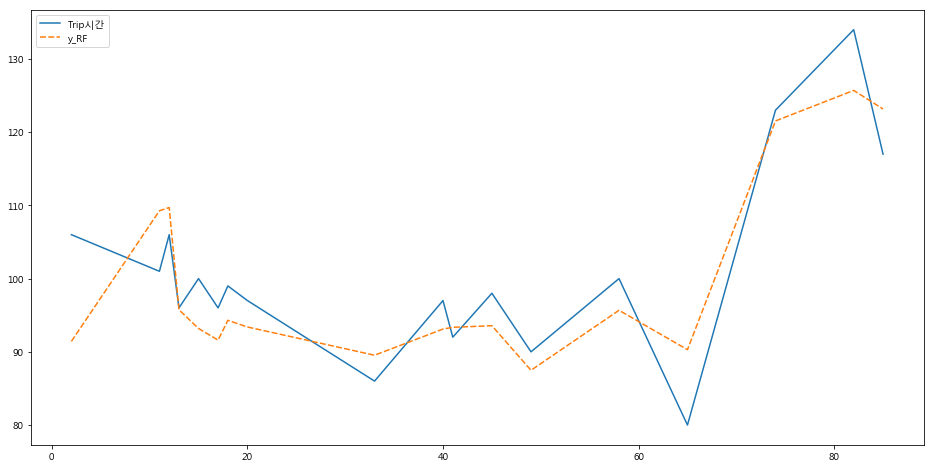

In [16]:
plt.figure(figsize=(16,8))
sns.lineplot(data=pred)

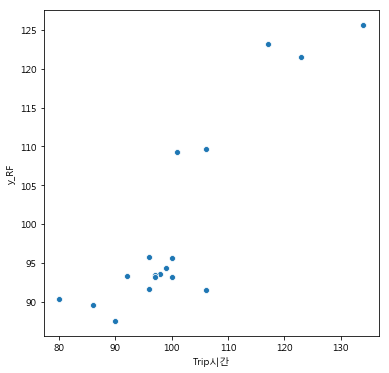

In [17]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=pred, x='Trip시간', y='y_RF')

In [18]:
pred['diff'] = abs(pred['Trip시간']-pred['y_RF'])

In [19]:
diff_max = pred['diff'].max()
diff_mean = pred['diff'].mean()
print(f'최대 : {diff_max:.3f}')
print(f'평균 : {diff_mean:.3f}')

최대 : 14.570
평균 : 5.144


In [20]:
pred[['diff']].describe()

,diff
count,18.000000
mean,5.144074
std,3.498631
min,0.256667
25%,3.551667
50%,4.363333
75%,6.650000
max,14.570000


## SVM

In [21]:
np.random.seed(7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
from sklearn.svm import SVR

In [29]:
svr = SVR(kernel="linear")
# , C=float("inf")
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

0.39803546880496127

## 선형

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
np.random.seed(7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
linr = LinearRegression()
linr.fit(X_train, y_train)
linr.score(X_test, y_test)

0.7989455091188472

In [27]:
pred['y_svr'] = svr.predict(X_test)
pred['y_linr'] = linr.predict(X_test)

pred[:5]

,Trip시간,y_RF,diff,y_svr,y_linr
13,96,95.743333,0.256667,92.733981,87.946899
45,98,93.566667,4.433333,97.399880,93.107908
17,96,91.600000,4.400000,95.551332,92.042792
20,97,93.393333,3.606667,97.743003,97.375637
12,106,109.710000,3.710000,99.532222,106.153246


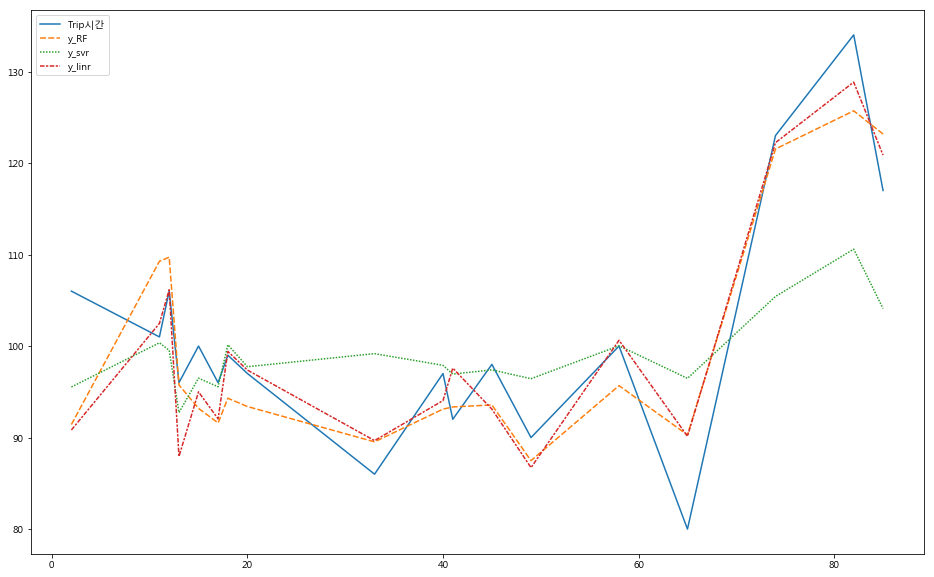

In [30]:
plt.figure(figsize=(16,10))
sns.lineplot(data=pred.drop('diff', axis=1))

### 스케일링

In [31]:
from sklearn.preprocessing import  MinMaxScaler

In [32]:
scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X)
# y_sc = scaler.fit_transform(y.values.reshape(-1,1)).ravel()

# y도 스케일링이 필요한가?? => ㄴㄴ y는 독립이므로 안해도됨

In [33]:
pd.DataFrame(X_sc[:3].round(4), columns=X.columns)

,S하중,S저항,T저항,M하중,M_stroke,C하중,C_stroke,C저항,저항합,Gap,초기위치,이동속도
0,1.0000,0.1782,0.3262,0.3514,0.3833,0.5701,0.3636,0.2653,0.1346,0.3465,0.5955,0.6883
1,0.6429,0.1683,0.5319,0.3243,0.4000,0.3364,0.4182,0.2558,0.3141,0.1960,0.5407,0.1234
2,0.6607,0.2574,0.1773,0.3514,0.2167,0.3364,0.1636,0.5539,0.0513,0.3122,0.5567,0.3506


In [34]:
np.random.seed(7)
X_sc_train, X_sc_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2)

In [35]:
## RF

In [36]:
rfc_sc = RandomForestRegressor(n_estimators=300)
rfc_sc.fit(X_sc_train, y_train)
rfc_sc.score(X_sc_test, y_test)

0.7590020667291764

In [37]:
## SVM

In [45]:
svr_sc = SVR(kernel="linear")
svr_sc.fit(X_sc_train, y_train)
svr_sc.score(X_sc_test, y_test)

0.3512434617486495

In [39]:
## Linear

In [40]:
linr_sc = LinearRegression()
linr_sc.fit(X_sc_train, y_train)
linr_sc.score(X_sc_test, y_test)

0.799439791050306

In [41]:
pred_sc = pd.DataFrame(y_test)

In [42]:
pred_sc['y_rfc_sc'] = rfc_sc.predict(X_sc_test)
pred_sc['y_svr_sc'] = svr_sc.predict(X_sc_test)
pred_sc['y_linr_sc'] = linr_sc.predict(X_sc_test)
pred_sc[:5]

,Trip시간,y_rfc_sc,y_svr_sc,y_linr_sc
13,96,95.743333,96.129523,88.013672
45,98,93.560000,95.253203,93.119141
17,96,91.556667,94.604596,92.044922
20,97,93.386667,94.419673,97.417969
12,106,109.770000,97.484733,106.189453


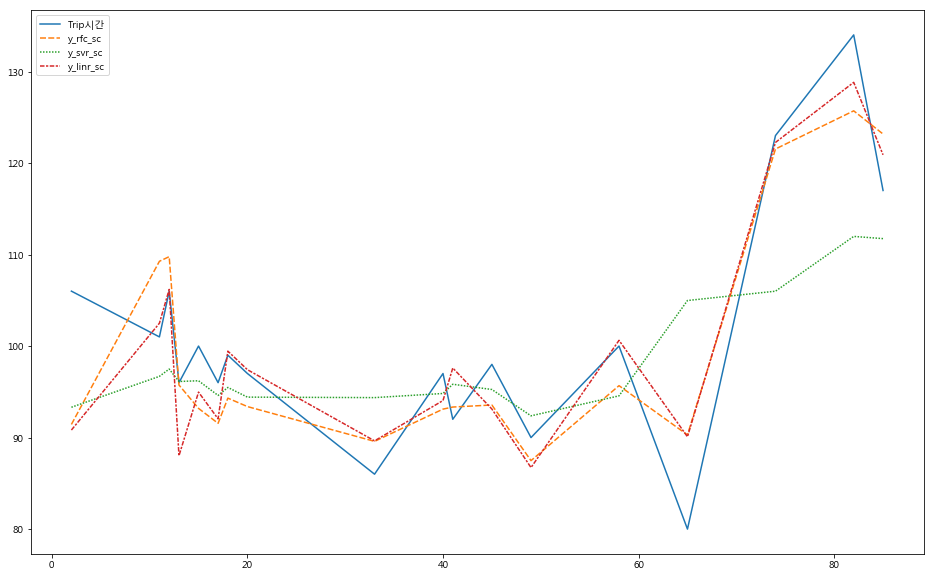

In [43]:
plt.figure(figsize=(16,10))
sns.lineplot(data=pred_sc)

In [ ]:
# scaler.inverse_transform(svr.predict(X_test).reshape(-1,1))

In [ ]:
# pred['y_svr'] = svr.predict(X_test)
# # pred['y_svr_sc'] = svr.predict(X_sc_test)
# pred['y_linr'] = linr.predict(X_test)
# # pred['y_linr'] = scaler.inverse_transform(linr.predict(pred['y_linr'].values.reshape(-1,1)))
# # pred['y_linr_sc'] = linr.predict(X_sc_test)

# pred[:5]